# 1. Install and Import Dependencies

In [9]:
!pip install torch

     ------------------------------------ 158.0/158.0 MB 546.8 kB/s eta 0:00:00
  Using cached typing_extensions-4.2.0-py3-none-any.whl (24 kB)


In [12]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [13]:
!cd yolov5 & pip install -r requirements.txt

  Using cached matplotlib-3.5.2-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached numpy-1.22.3-cp310-cp310-win_amd64.whl (14.7 MB)
  Using cached opencv_python-4.5.5.64-cp36-abi3-win_amd64.whl (35.4 MB)
  Using cached Pillow-9.1.0-cp310-cp310-win_amd64.whl (3.3 MB)
     ------------------------------------ 151.7/151.7 KB 565.6 kB/s eta 0:00:00
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached scipy-1.8.0-cp310-cp310-win_amd64.whl (37.0 MB)
     ---------------------------------------- 1.0/1.0 MB 418.4 kB/s eta 0:00:00
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
     ---------------------------------------- 5.8/5.8 MB 470.6 kB/s eta 0:00:00
  Using cached pandas-1.4.2-cp310-cp310-win_amd64.whl (10.6 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)
  Using cached kiwisolver-1.4.2-cp310-cp310-win_amd64.whl (55 kB)
  Using cached c

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [18]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\gufra/.cache\torch\hub\master.zip
YOLOv5  2022-5-8 torch 1.11.0+cpu CPU

100%|███████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:22<00:00, 663kB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


# 3. Make Detections with Images

In [20]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [21]:
results = model(img)

In [22]:
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 824.2ms pre-process, 550.5ms inference, 8.0ms NMS per image at shape (1, 3, 384, 640)


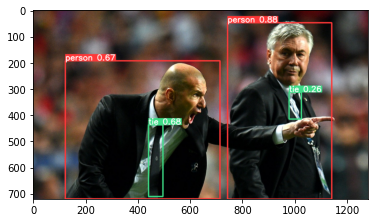

In [25]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

# 4. Real Time Detections

In [26]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [5]:
import uuid   # Unique identifier
import os
import time

In [31]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [32]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [33]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [34]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

  Using cached PyQt5-5.15.6-cp36-abi3-win_amd64.whl (6.7 MB)
  Using cached lxml-4.8.0-cp310-cp310-win_amd64.whl (3.6 MB)
  Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl (50.1 MB)
  Using cached PyQt5_sip-12.10.1-cp310-cp310-win_amd64.whl (77 kB)


In [2]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 250 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=250, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\gufra\Documents\Project\Belajar\Dworsiness': No such file or directory
YOLOv5  2022-5-8 torch 1.11.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl

# 6. Load Custom Model

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\gufra/.cache\torch\hub\master.zip
YOLOv5  2022-5-8 torch 1.11.0+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients
Adding AutoShape... 


In [11]:
img = os.path.join('data', 'images', 'drowsy.69305c28-ce85-11ec-8e04-1418c3318bd8.jpg')

In [12]:
results = model(img)

In [13]:
results.print()

image 1/1: 480x640 1 ngantuk
Speed: 6.5ms pre-process, 187.1ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)


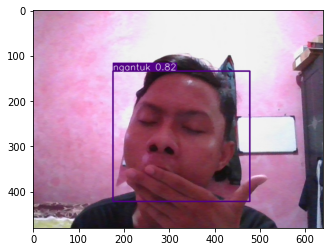

In [14]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [16]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()